# Surnjani Djoko
# Created Dec 6, 2021

In [21]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# show visual count of categorical variable

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# extract categorical vs. numerical columns
def find_diff_type_var(df):
    cat_var = df.loc[:,df.dtypes == np.object].columns
    num_var = df.loc[:,df.dtypes != np.object].columns
    return(cat_var, num_var)

In [15]:
# numerical correlation
def plot_pearson_correlation(df, cols, low_thres, high_thres):
    # customized
    
    corr_df = df[cols].corr()
    # Get only half portion of corr_df to avoid df, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='coolwarm', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if low_thres < t < high_thres:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    # Save fig uncomment first
    # plt.savefig("Heatmap DF")
    plt.show()
    return corr_df

# in case the table is getting too big, we can use the list that cap the threshold
def list_pearson_correlation(df, cols, low_thres, high_thres):
    '''
    low_thres ~ -0.5
    high_thres ~ 0.5
    '''
    
    corr = df[cols].corr()
    corr_list=[]
    for i in range(0, len(corr.index)):
        for j in range(0, len(corr.columns)):
            if ((corr.iloc[i,j] > high_thres or corr.iloc[i,j] < low_thres) and corr.iloc[i,j] != 1):
                corr_list.append(str(corr.index[i] + ' and ' + corr.columns[j] + ' : ' + str(round(corr.iloc[i,j], 2))))       

    corr_list = '\n'.join(corr_list)
    print(corr_list)

In [27]:
# reading in all dataset
train_nlp = pd.read_csv('data/train_topic_model_prob.csv')
test_nlp = pd.read_csv('data/test_topic_model_prob.csv')
print(f"train_nlp's size: {train_nlp.shape[0]} and test_nlp's size: {test_nlp.shape[0]}")

train_eng = pd.read_csv('data/train_impute_transform.csv')
test_eng = pd.read_csv('data/test_impute_transform.csv')
print(f"train_eng's size {train_eng.shape[0]} and test_eng's size {test_eng.shape[0]}")

train_nlp's size: 14028 and test_nlp's size: 3508
train_eng's size 14028 and test_eng's size 3508


In [28]:
train_eng.shape

(14028, 72)

In [29]:
train_nlp.drop(columns='Unnamed: 0', inplace=True)
test_nlp.drop(columns='Unnamed: 0', inplace=True)

In [30]:
# join the NLP topic modeling with feature imputation/engineering dataset
train_all = pd.merge(train_eng, train_nlp, how='left', on='Incident_Numberinc_')
print(train_all.shape)
test_all = pd.merge(test_eng, test_nlp, how='left', on='Incident_Numberinc_')
print(train_all.shape)

(14028, 77)
(14028, 77)


In [31]:
train_all.sample(3)

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Numberinc_,Initial_CAD_Event_Type,Level_Of_Origin,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Firefighter_Casualties,LABEL,DISTANCE_INCIDENT_FIRESTATION,DOW,IS_WEEKEND,MONTH,MINUTES_TO_ARRIVE,MINUTES_TO_LEAVE,INCIDENT_PERIOD_NUM,IS_HOLIDAY,IS_HOLIDAY_LAG1,IS_HOLIDAY_LEAD1,IS_HOLIDAY_SEASON,rain_v,snow_v,snow_on_ground_v,temperature_avg,relative_humidity_avg,wind_speed_avg,FSA,density,poor_building_condition,condo_dwelling,Average_Age,Median_Age,male,min_dist_to_hydrant,Estimated_Number_Of_Persons_Displaced_imputed,min_dist_to_hydrant_imputed,DISTANCE_INCIDENT_FIRESTATION_imputed,Property_Use_imputed,Estimated_Dollar_Loss_imputed,Level_Of_Origin_impute,Level_Of_Origin_encoded,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_imputed,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_woe,Smoke_Spread_imputed,Smoke_Spread_woe,Level_Of_Origin_encoded_imputed,Level_Of_Origin_encoded_woe,Extent_Of_Fire_imputed,Extent_Of_Fire_woe,t0,t1,t2,t3,t4
2931,86 - Passenger Area,08 - Not Applicable,8 - Not applicable (not a business),0,0,1000.0,NaN,NaN,01 - Fire,Not applicable,8 - Not applicable (no system),2 - No Fire alarm system,999 - Undetermined,F16067839,VEF,NaN,99 - Undetermined (formerly 98),1 - Extinguished by fire department,1,4,99 - Undetermined,901 - Automobile,Not applicable,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,Not applicable,Not applicable,8 - Not applicable - no sprinkler system present,9 - Undetermined,1 - Fire extinguished prior to arrival,0,0,13690.434847,0,0,7,7.450,26.683,2,0,0,0,0,3.13,0.00,0.0,21.995,67.945,13.510,M8V,5441.27,0.072047,0.394502,42.4,41.6,0.481896,18.821263,17.0,18.821263,13690.434847,901 - Automobile,1000.0,999,below_grade_level,Not applicable,-2.197231,Not applicable,-2.197231,below_grade_level,-0.893688,8 - Entire Structure,-1.515563,0.066675,0.733224,0.066764,0.066668,0.066668
3381,87 - Trunk/Cargo Area,08 - Not Applicable,8 - Not applicable (not a business),0,0,2000.0,0.0,1 - Confined to object of origin,01 - Fire,7 - Not applicable: Occupant(s) first alerted ...,2 - Fire alarm system did not operate,1 - Fire alarm system present,999 - Undetermined,F14031795,VEFU,B01,96 - Multiple diverse objects ignited,3 - Extinguished by occupant,6,20,99 - Undetermined,323 - Multi-Unit Dwelling - Over 12 Units,3 - Floor/suite of fire origin: Smoke alarm pr...,4 - Remote from fire – smoke did not reach alarm,4 - Interconnected,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,1 - Fire extinguished prior to arrival,0,0,13685.548608,5,1,4,5.650,16.017,1,0,0,0,0,2.04,0.13,0.3,6.260,64.675,17.845,M1T,5376.37,0.068885,0.251161,44.0,44.6,0.459881,22.799689,0.0,22.799689,13685.548608,323 - Multi-Unit Dwelling - Over 12 Units,2000.0,B01,below_grade_level,"8 - Not applicable: No alarm, no persons present",-1.142621,2 - Confined to part of room/area of origin,-0.444676,below_grade_level,-0.893688,1 - Confined to object of origin,-0.191537,0.033612,0.033341,0.865457,0.033531,0.034059
11949,81 - Engine Area,08 - Not Applicable,8 - Not applicable (not a business),0,0,1500.0,NaN,NaN,01 - Fire,Not applicable,8 - Not applicable (no system),2 - No Fire alarm system,81 - Ve

In [32]:
train_all.to_csv('data/final_train.csv', index=False)
test_all.to_csv('data/final_test.csv', index=False)

In [100]:
train_all = pd.read_csv('data/final_train.csv')
print(train_all.shape)
train_all.sample(3)

(14028, 77)


,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Numberinc_,Initial_CAD_Event_Type,Level_Of_Origin,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Firefighter_Casualties,LABEL,DISTANCE_INCIDENT_FIRESTATION,DOW,IS_WEEKEND,MONTH,MINUTES_TO_ARRIVE,MINUTES_TO_LEAVE,INCIDENT_PERIOD_NUM,IS_HOLIDAY,IS_HOLIDAY_LAG1,IS_HOLIDAY_LEAD1,IS_HOLIDAY_SEASON,rain_v,snow_v,snow_on_ground_v,temperature_avg,relative_humidity_avg,wind_speed_avg,FSA,density,poor_building_condition,condo_dwelling,Average_Age,Median_Age,male,min_dist_to_hydrant,Estimated_Number_Of_Persons_Displaced_imputed,min_dist_to_hydrant_imputed,DISTANCE_INCIDENT_FIRESTATION_imputed,Property_Use_imputed,Estimated_Dollar_Loss_imputed,Level_Of_Origin_impute,Level_Of_Origin_encoded,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_imputed,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_woe,Smoke_Spread_imputed,Smoke_Spread_woe,Level_Of_Origin_encoded_imputed,Level_Of_Origin_encoded_woe,Extent_Of_Fire_imputed,Extent_Of_Fire_woe,t0,t1,t2,t3,t4
7980,24 - Cooking Area or Kitchen,01 - Normal (no change),1 - No business interruption,0,0,15000.0,0.0,1 - Confined to object of origin,01 - Fire,"8 - Not applicable: No fire alarm system, no p...",8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,14 - Open Fired Barbeque - Fixed or Portable,F13048415,FIR,001,55 - Wood,1 - Extinguished by fire department,10,34,20 - Design/Construction/Installation/Maintena...,301 - Detached Dwelling,1 - Floor/suite of fire origin: No smoke alarm,4 - Remote from fire – smoke did not reach alarm,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,4 - Flames showing from small area (one storey...,0,0,13674.587382,5,1,6,5.117,50.433,1,0,0,0,0,2.37,0.00,0.0,19.980,67.235,14.135,M4E,6419.57,0.079424,0.062703,40.1,41.9,0.477740,14.787424,0.0,14.787424,13674.587382,301 - Detached Dwelling,15000.0,001,low_rise_level,"8 - Not applicable: No alarm, no persons present",-1.142621,2 - Confined to part of room/area of origin,-0.444676,low_rise_level,0.365566,1 - Confined to object of origin,-0.191537,0.795997,0.050354,0.050768,0.050287,0.052594
7366,81 - Engine Area,08 - Not Applicable,8 - Not applicable (not a business),0,0,100000.0,NaN,NaN,01 - Fire,Not applicable,8 - Not applicable (no system),2 - No Fire alarm system,24 - Circuit Wiring - Copper,F12078274,VEFH,NaN,99 - Undetermined (formerly 98),1 - Extinguished by fire department,15,49,99 - Undetermined,"904 - Trailer Combin. (e.g. auto trailer, smal...",Not applicable,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,Not applicable,Not applicable,8 - Not applicable - no sprinkler system present,9 - Undetermined,"7 - Fully involved (total structure, vehicle, ...",0,0,13698.272844,2,0,7,8.483,244.500,1,0,0,0,0,2.80,0.00,0.0,21.860,68.265,13.060,M6A,3610.31,0.088820,0.275155,40.4,39.0,0.435258,68.715246,17.0,68.715246,13698.272844,"904 - Trailer Combin. (e.g. auto trailer, smal...",100000.0,999,below_grade_level,Not applicable,-2.197231,Not applicable,-2.197231,below_grade_level,-0.893688,8 - Entire Structure,-1.515563,0.022227,0.910903,0.022222,0.022223,0.022425
2963,24 - Cooking Area or Kitchen,01 - Norma

In [34]:
cat_cols, num_cols = find_diff_type_var(train_all)
print(cat_cols)
print(num_cols)

Index(['Area_of_Origin', 'Building_Status', 'Business_Impact',
       'Extent_Of_Fire', 'Final_Incident_Type',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
       'Fire_Alarm_System_Presence', 'Ignition_Source', 'Incident_Numberinc_',
       'Initial_CAD_Event_Type', 'Level_Of_Origin', 'Material_First_Ignited',
       'Method_Of_Fire_Control', 'Possible_Cause', 'Property_Use',
       'Smoke_Alarm_at_Fire_Origin',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
       'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation',
       'Smoke_Spread', 'Sprinkler_System_Operation',
       'Sprinkler_System_Presence', 'Status_of_Fire_On_Arrival', 'FSA',
       'Property_Use_imputed', 'Level_Of_Origin_impute',
       'Level_Of_Origin_encoded',
       'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_imputed',
       'Smoke_Spread_imputed', 'Level_Of_Origin_encoded_imputed',
       'Extent_

In [101]:
keep_cols = ['LABEL','Count_of_Persons_Rescued','Number_of_responding_apparatus','Number_of_responding_personnel',
             'TFS_Firefighter_Casualties','IS_WEEKEND','MONTH','MINUTES_TO_ARRIVE','MINUTES_TO_LEAVE',
 'INCIDENT_PERIOD_NUM','IS_HOLIDAY','IS_HOLIDAY_LAG1','IS_HOLIDAY_LEAD1','IS_HOLIDAY_SEASON',
 'rain_v','snow_v','snow_on_ground_v','temperature_avg',
 'relative_humidity_avg','wind_speed_avg','density',
 'poor_building_condition','condo_dwelling','Average_Age',
 'Median_Age','male', 'Estimated_Number_Of_Persons_Displaced_imputed',
 'min_dist_to_hydrant_imputed','DISTANCE_INCIDENT_FIRESTATION_imputed',
 #'Property_Use_imputed',
 'Estimated_Dollar_Loss_imputed',
 #'Level_Of_Origin_encoded',
# 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_imputed',
 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_woe',
# 'Smoke_Spread_imputed',
 'Smoke_Spread_woe',
# 'Level_Of_Origin_encoded_imputed',
 'Level_Of_Origin_encoded_woe',
# 'Extent_Of_Fire_imputed',
 'Extent_Of_Fire_woe','t0','t1','t2','t3','t4']

In [102]:
train_all = train_all[keep_cols]

In [103]:
X_train = train_all.drop(labels=['LABEL'], axis=1)
y_train = train_all['LABEL']

In [91]:
X_train.shape

(14028, 38)

In [92]:
y_train.shape

(14028,)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14028 entries, 0 to 14027
Data columns (total 38 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Count_of_Persons_Rescued                                           14028 non-null  int64  
 1   Number_of_responding_apparatus                                     14028 non-null  int64  
 2   Number_of_responding_personnel                                     14028 non-null  int64  
 3   TFS_Firefighter_Casualties                                         14028 non-null  int64  
 4   IS_WEEKEND                                                         14028 non-null  int64  
 5   MONTH                                                              14028 non-null  int64  
 6   MINUTES_TO_ARRIVE                                                  14028 non-null  float64
 7   MINUTES_TO_LEAVE      

# (1) Review if there is any constant features

In [58]:
from sklearn.feature_selection import VarianceThreshold

# Features with a training-set variance lower than this threshold will be removed. 
# The default (default=0) is to keep all features with non-zero variance, i.e. remove the features that have the same value in all samples.

# it is not clear how much to put on the threshold ...............
# 0.8 means low variance for 80% of the sample??
vs_constant = VarianceThreshold(threshold=0.03)

# select the numerical columns only.
numerical_x_train = X_train[X_train.select_dtypes([np.number]).columns]
display(numerical_x_train.shape)

# fit the object to our data.
vs_constant.fit(numerical_x_train)

# get the constant column names.
constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]

# currently we do not have categorical variables
'''
# detect constant categorical variables.
constant_cat_columns = [column for column in x_train.columns 
                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

# conctenating the two lists.
all_constant_columns = constant_cat_columns + constant_columns
'''

(14028, 38)

'\n# detect constant categorical variables.\nconstant_cat_columns = [column for column in x_train.columns \n                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]\n\n# conctenating the two lists.\nall_constant_columns = constant_cat_columns + constant_columns\n'

In [59]:
constant_columns
# not clear how to set the threshold .....

['TFS_Firefighter_Casualties',
 'IS_HOLIDAY',
 'IS_HOLIDAY_LAG1',
 'IS_HOLIDAY_LEAD1',
 'poor_building_condition',
 'male']

In [60]:
## Quasi-constant features
# make a threshold for quasi constant.
threshold = 0.95

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in X_train.columns:

    # calculate the ratio.
    predominant = (X_train[feature].value_counts() / np.float(len(X_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

# drop the quasi constant columns
#x_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
#x_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)

['Count_of_Persons_Rescued', 'TFS_Firefighter_Casualties', 'IS_HOLIDAY', 'IS_HOLIDAY_LAG1', 'IS_HOLIDAY_LEAD1']


# (2) Pearson correlation

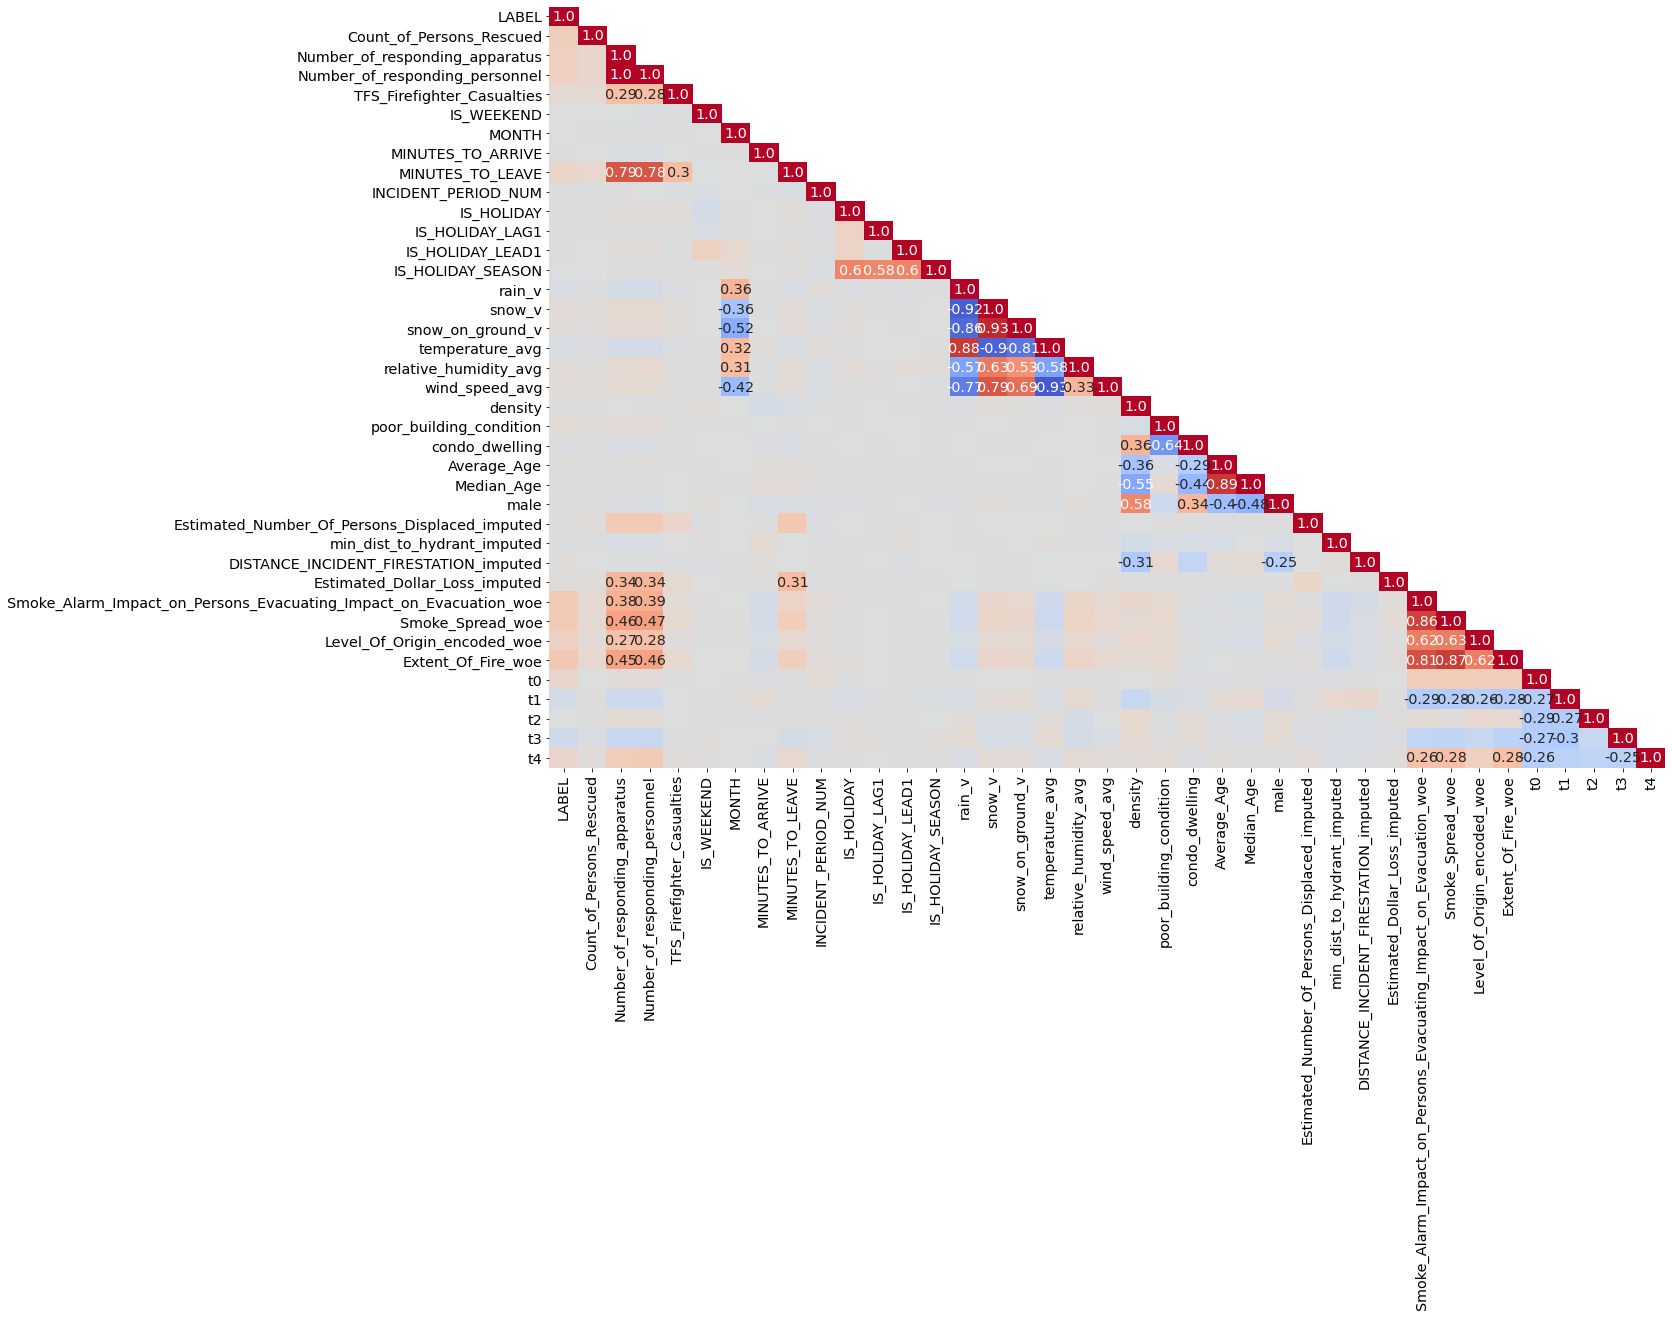

In [22]:
# Only higher correlations are displayed for this data its chosen to be higher than 0.25 or lower than -0.25. 
# U can use your own range.
corr_df = plot_pearson_correlation(train_all, list(keep_cols), -0.25, 0.25)

# (3) Tree based - Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

importances

array([0.08676951, 0.02351779, 0.031556  , 0.00286455, 0.00435677,
       0.01496547, 0.03616023, 0.06323154, 0.01466381, 0.00160209,
       0.00130002, 0.0020224 , 0.00248622, 0.03011836, 0.01755443,
       0.01602755, 0.03292786, 0.03365993, 0.0313693 , 0.02301624,
       0.02503913, 0.02389735, 0.0220542 , 0.02549946, 0.02425097,
       0.03092056, 0.03565414, 0.04023338, 0.03012846, 0.03503456,
       0.03025553, 0.01408877, 0.02098041, 0.03979935, 0.03009698,
       0.03135417, 0.03554208, 0.03500048])

In [80]:
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)
display(final_df.head(3))

,Features,Importances
0,Count_of_Persons_Rescued,0.086770
7,MINUTES_TO_LEAVE,0.063232
27,DISTANCE_INCIDENT_FIRESTATION_imputed,0.040233


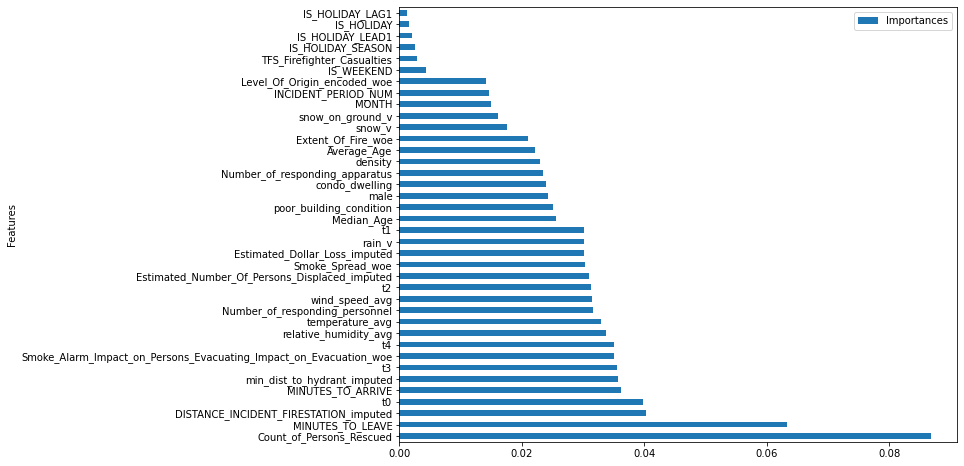

In [81]:
fig, ax = plt.subplots(figsize = (10, 8))
final_df.plot.barh(x='Features',y='Importances', ax=ax)
plt.show()

## DT using univariate ROC-AUC

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819 entries, 6677 to 2732
Data columns (total 38 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Count_of_Persons_Rescued                                           9819 non-null   int64  
 1   Number_of_responding_apparatus                                     9819 non-null   int64  
 2   Number_of_responding_personnel                                     9819 non-null   int64  
 3   TFS_Firefighter_Casualties                                         9819 non-null   int64  
 4   IS_WEEKEND                                                         9819 non-null   int64  
 5   MONTH                                                              9819 non-null   int64  
 6   MINUTES_TO_ARRIVE                                                  9819 non-null   float64
 7   MINUTES_TO_LEAVE     

In [105]:
# import the DecisionTree Algorithm and evaluation score.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# list of the resulting scores.
roc_values = []

# loop over all features and calculate the score.
for feature in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(x_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

# create a Pandas Series for visualisation.
roc_values = pd.Series(roc_values)
roc_values.index = x_train.columns

# show the results.
print(roc_values.sort_values(ascending=False).head(10))

Estimated_Number_Of_Persons_Displaced_imputed                        0.793626
Extent_Of_Fire_woe                                                   0.771367
Smoke_Spread_woe                                                     0.763373
Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation_woe    0.753028
Number_of_responding_apparatus                                       0.729675
Number_of_responding_personnel                                       0.703021
Level_Of_Origin_encoded_woe                                          0.680113
Estimated_Dollar_Loss_imputed                                        0.634245
t2                                                                   0.600197
Count_of_Persons_Rescued                                             0.596722
dtype: float64


# (4) Lasso regularization with logistic regression

In [95]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819 entries, 6677 to 2732
Data columns (total 38 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Count_of_Persons_Rescued                                           9819 non-null   int64  
 1   Number_of_responding_apparatus                                     9819 non-null   int64  
 2   Number_of_responding_personnel                                     9819 non-null   int64  
 3   TFS_Firefighter_Casualties                                         9819 non-null   int64  
 4   IS_WEEKEND                                                         9819 non-null   int64  
 5   MONTH                                                              9819 non-null   int64  
 6   MINUTES_TO_ARRIVE                                                  9819 non-null   float64
 7   MINUTES_TO_LEAVE     

In [96]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [98]:
# using logistic regression with penalty l1.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selection = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
selection.fit(x_train, y_train)

# see the selected features.
selected_features = x_train.columns[(selection.get_support())]

# see the deleted features.
removed_features = x_train.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]
removed_features

Index(['IS_HOLIDAY', 'IS_HOLIDAY_LEAD1', 'condo_dwelling', 'male', 't2'], dtype='object')